# TRABAJO FINAL DATASET

## COSTO VIDA 

### Índice

1. Visualizacion del DATASET.

2. Limpieza del DATASET.

3. Tratamiento de datos.

4. Objetivos principales.

5. Correlación entre variables.

6. Conclusiones

<img src='mapa_mundi.png'>

He elegido un dataset del costo de la vida en diferentes ciudades de diferentes paises, el costo aparece en dolares estadounidenses. El dataset inicial esta formado por 4956 filas, 58 columnas y nos aporta la siguiente información: 

<img src='leyenda_dataset.jpg'>








## **1. Visualización del DATASET.**

A continuacion vamos a visualizar el dataset, para ello importamos los modulos y librerias necesarios:

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path

Una vez importados los modulos, realizamos la lectura de nuestro csv (delimitado por comas) y agregamos a mano las columnas de nuestro dataset.

In [274]:
vida_path= path.join('cost-of-living_v2.csv')
vida=pd.read_csv(vida_path,sep=',')
data=vida[['city','country','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30','x31','x32','x33','x34','x35','x36','x37','x38','x39','x40','x41','x42','x43','x44','x45','x46','x47','x48','x49','x50','x51','x52','x53','x54','x55','data_quality']]
display(data)

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,110.36,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,123.51,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,43.89,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,41.17,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,36.50,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,Peterborough,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4952,Georgetown,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4953,Ixtapa Zihuatanejo,Mexico,5.16,30.94,12.89,0.98,NaN,1.80,0.62,0.41,...,103.14,412.55,257.84,515.69,412.55,NaN,NaN,NaN,NaN,0
4954,Iqaluit,Canada,29.65,74.27,13.71,6.67,8.89,3.71,3.52,4.08,...,NaN,NaN,NaN,2964.60,2964.60,NaN,NaN,NaN,6.53,0


## **2. Limpieza del DATASET.**

Lo primero de todo, con la funcion ".dtypes" analizo el tipo de dato que hay en cada columna, para asi asegurarme de manejar de una forma correcta los datos:

In [275]:
data.dtypes

city             object
country          object
x1              float64
x2              float64
x3              float64
x4              float64
x5              float64
x6              float64
x7              float64
x8              float64
x9              float64
x10             float64
x11             float64
x12             float64
x13             float64
x14             float64
x15             float64
x16             float64
x17             float64
x18             float64
x19             float64
x20             float64
x21             float64
x22             float64
x23             float64
x24             float64
x25             float64
x26             float64
x27             float64
x28             float64
x29             float64
x30             float64
x31             float64
x32             float64
x33             float64
x34             float64
x35             float64
x36             float64
x37             float64
x38             float64
x39             float64
x40             

Observo que los dos primeros campos, "city" y "country" son de tipo objecto, el ultimo de tipo entero y el resto de tipo decimal, con esto verificamos que no hay ningun campo que tenga datos distintos en las entradas, es decir que hay datos homogeneos dentro de cada campo.

### 2.1. Limpieza de datos "NaN"(Not-A-Number):

Es muy importante deshacernos de este tipo de datos, ya que cualquier operacion que hagamos con ellos devuelve el resultado de NaN esto podria llevarnos a desvirtualizar el analisis de nuestro dataset.

Es por ello que vamos eliminar todas las filas que contengan datos NaN, el objetivo de este analisis del dataset es realizar comparaciones entre las diferentes ciudad y costos de vida de ellas, por lo que no seria logico reemplazar los valores NaN por cualquier  otra valor, ya que estaria modificando los datos de una manera importante, por ejemplo al estar hablando de costo de vida si remplazamos los valores NaN por un cero, estariamos diciendo que algo vale cero dolares y alterariamos la realidad del dataset, del mismo modo si remplazamos los valores NaN por una cifra muy grande alterariamos gravemente la informacion. Puesto que tengo un dataset con muchas entradas (filas) voy a optar por eliminar directamnete todas las filas que contengan algun NaN en sus datos, para ellos vamos a utilizar el metodo ".count" especificando "(axis=1)" para verificar que me cuenta los valores por fila. Este metodo cuenta el numero de valores no nulos que tengo por cada fila. 

In [276]:
data.count(axis=1)

0       58
1       58
2       58
3       58
4       58
        ..
4951     3
4952     3
4953    31
4954    38
4955    19
Length: 4956, dtype: int64

Como el dataset tiene un total de 58 columnas, todas aquellas filas que no cumplan tener 58 datos, son filas que contienen algun NaN. Utilizare el valor 58 como filtro para eliminar todas aquellas que no cumplan esta condición.
Con el metodo ".dropna" elimino todas las filas que contienen datos NaN, y con el "(thresh=58)" verifico que borre aquellas que no tienen 58 datos en sus entradas.

In [277]:
data_new=data.dropna(thresh=58)

Para asegurarnos de que hemos borrado todos los datos NaN, utilizamos el metodo ".isnull()" y le pedimos que realice la suma de los nulos con el comando ".sum()"

In [278]:
data_new.isnull().sum()

city            0
country         0
x1              0
x2              0
x3              0
x4              0
x5              0
x6              0
x7              0
x8              0
x9              0
x10             0
x11             0
x12             0
x13             0
x14             0
x15             0
x16             0
x17             0
x18             0
x19             0
x20             0
x21             0
x22             0
x23             0
x24             0
x25             0
x26             0
x27             0
x28             0
x29             0
x30             0
x31             0
x32             0
x33             0
x34             0
x35             0
x36             0
x37             0
x38             0
x39             0
x40             0
x41             0
x42             0
x43             0
x44             0
x45             0
x46             0
x47             0
x48             0
x49             0
x50             0
x51             0
x52             0
x53             0
x54       

Hemos verificado que no tenemos ningun dato NaN en nuestro DATASET.

## 3. Tratamiento de datos:

Observo que de las 4956 ciudades iniciales me he quedado con 1278, he reducido los datos a casi 1/4 de los iniciales. Hemos perdido mucha informacion de muchas ciudades, pero de esta forma nos verificamos que las conclusiones que saquemos acerca de ellas sean reales, no puedo utilizar el fillna() y reemplazar los NaN por otros valores ya que si lo hiciese estaría inventandome los precios de los costos de la vida, por lo que la decision más acertada ha sido eliminarlos.

In [279]:
display(data_new)

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,110.36,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,123.51,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,43.89,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,41.17,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,36.50,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4809,Gig Harbor,United States,12.00,40.00,10.50,7.00,6.00,5.21,2.48,1.94,...,101.67,1800.00,2000.00,3000.00,2400.00,3821.19,2852.44,4500.00,5.23,0
4826,Lysa nad Labem,Czech Republic,4.33,32.40,5.19,1.25,2.29,2.15,1.24,0.97,...,73.50,605.62,410.96,854.36,583.99,3028.10,1297.76,634.46,7.00,0
4928,Murovani Kurylivtsi,Ukraine,2.72,12.24,2.69,0.68,1.09,0.68,0.24,0.14,...,61.19,108.79,95.19,163.18,122.38,237.97,231.17,365.79,13.05,0
4945,Tirupati,India,2.46,9.21,4.30,2.21,3.07,1.47,0.46,0.14,...,37.25,82.90,61.41,184.23,128.96,661.00,396.60,614.09,7.97,0


Si realizo la estadistica descriptiva de todos los datos que conforman mi DataFrame, veo que la informacion que recibo es un poco ambigua.
Es por ello que más adelante vamos a tratar de analizarla con un sentido mas realista.

In [280]:
data_new.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
count,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,...,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000
mean,9.829562,44.176479,6.875649,3.375164,3.843380,2.654820,1.533161,1.104218,1.178239,1.525125,...,88.488239,704.967574,540.924765,1286.113286,951.520548,3560.497246,2476.100806,1722.194264,6.554444,0.582160
std,6.186888,25.206319,2.648909,2.133670,1.987779,1.228995,0.907922,0.764033,0.504803,0.961568,...,37.033938,676.041512,528.765222,1241.145051,917.149061,7472.852125,3381.997208,1528.501334,5.573739,0.493397
min,0.670000,5.850000,2.110000,0.460000,0.500000,0.390000,0.180000,0.080000,0.390000,0.080000,...,15.480000,43.960000,22.350000,67.990000,51.260000,114.290000,90.060000,35.750000,0.800000,0.000000
25%,4.315000,23.530000,4.910000,1.600000,2.250000,1.602500,0.770000,0.462500,0.870000,0.780000,...,63.707500,284.710000,193.457500,517.595000,369.945000,1266.972500,880.020000,498.545000,2.765000,0.000000
50%,8.490000,39.550000,6.695000,2.630000,3.480000,2.500000,1.400000,0.980000,1.080000,1.280000,...,87.640000,520.580000,391.540000,930.650000,695.470000,2369.495000,1708.350000,1124.650000,5.115000,1.000000
75%,14.820000,63.220000,8.550000,5.000000,5.077500,3.510000,2.207500,1.580000,1.327500,2.040000,...,110.190000,934.070000,734.212500,1700.995000,1299.680000,4286.070000,2986.605000,2700.660000,8.750000,1.000000
max,32.050000,150.000000,18.500000,12.520000,14.290000,6.020000,5.640000,4.420000,6.810000,6.850000,...,542.740000,12608.830000,8989.370000,24960.290000,17868.180000,240963.670000,80321.220000,7935.380000,56.250000,1.000000


Nuestro dataset tiene 58 columnas, un dato muy poco manejable, es por ello por lo que vamos agrupar algunas columnas que nos den informacion similar en un mismo campo.

### 3.1. Agrupacion de datos

-> Generamos una nueva columna que denotaremos como **"first_need_p"**, está contendrá el precio medio de los productos de primera necesidad, he considerado productos de primera necesidad los siguientes campos:

x9:Leche, x10:Pan, x11:Arroz, x12:Huevos, x13:Queso, x14:Filetes Pollo, x15:Carne y x20:Patatas.

Realizamos el ".mean" con (axis=1) para que realice la media por filas, obteniendo así un unico valor para cada ciudad de nuestro DataFrame.

In [281]:
data_new['first_need_p']=data_new[['x9','x10','x11','x12','x13','x14','x15','x20']].mean(axis=1)
display(data_new)

C:\Users\AnaRodriguezDomingue\AppData\Local\Temp\ipykernel_17340\4099768642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['first_need_p']=data_new[['x9','x10','x11','x12','x13','x14','x15','x20']].mean(axis=1)


,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x48,x49,x50,x51,x52,x53,x54,x55,data_quality,first_need_p
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1,10.02375
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1,5.74500
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1,3.94250
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1,2.37375
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1,2.16875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4809,Gig Harbor,United States,12.00,40.00,10.50,7.00,6.00,5.21,2.48,1.94,...,1800.00,2000.00,3000.00,2400.00,3821.19,2852.44,4500.00,5.23,0,6.85500
4826,Lysa nad Labem,Czech Republic,4.33,32.40,5.19,1.25,2.29,2.15,1.24,0.97,...,605.62,410.96,854.36,583.99,3028.10,1297.76,634.46,7.00,0,3.79250
4928,Murovani Kurylivtsi,Ukraine,2.72,12.24,2.69,0.68,1.09,0.68,0.24,0.14,...,108.79,95.19,163.18,122.38,237.97,231.17,365.79,13.05,0,2.14125
4945,Tirupati,India,2.46,9.21,4.30,2.21,3.07,1.47,0.46,0.14,...,82.90,61.41,184.23,128.96,661.00,396.60,614.09,7.97,0,2.14500


-> Agrupamos el precio de la ropa en un solo campo **"clothes"**:

x44:Jeans, x45:Vestido, x46:Zapatillas deporte, x47:Zapatillas vestir 


In [282]:
data_new['clothes']=(data_new[['x44','x45','x46','x47']].mean(axis=1))

C:\Users\AnaRodriguezDomingue\AppData\Local\Temp\ipykernel_17340\1901314438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['clothes']=(data_new[['x44','x45','x46','x47']].mean(axis=1))


In [283]:
display(data_new)

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x49,x50,x51,x52,x53,x54,x55,data_quality,first_need_p,clothes
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1,10.02375,71.4475
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1,5.74500,79.2825
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1,3.94250,51.9700
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1,2.37375,37.8900
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1,2.16875,38.0125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4809,Gig Harbor,United States,12.00,40.00,10.50,7.00,6.00,5.21,2.48,1.94,...,2000.00,3000.00,2400.00,3821.19,2852.44,4500.00,5.23,0,6.85500,72.1050
4826,Lysa nad Labem,Czech Republic,4.33,32.40,5.19,1.25,2.29,2.15,1.24,0.97,...,410.96,854.36,583.99,3028.10,1297.76,634.46,7.00,0,3.79250,65.7600
4928,Murovani Kurylivtsi,Ukraine,2.72,12.24,2.69,0.68,1.09,0.68,0.24,0.14,...,95.19,163.18,122.38,237.97,231.17,365.79,13.05,0,2.14125,45.4800
4945,Tirupati,India,2.46,9.21,4.30,2.21,3.07,1.47,0.46,0.14,...,61.41,184.23,128.96,661.00,396.60,614.09,7.97,0,2.14500,30.3725


-> Eliminamos todos los campos que hemos ido agrupando y los campos con los que no vamos a trabajar ya que su informacion no es del interes para este estudio, esta fuera de mi alcance manejar tantos datos:

In [284]:
data_new.drop(['x2','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x30','x32','x34','x35','x37','x40','x42','x43','x44','x45','x46','x47','x48','x50','x51','x52','x53','x55','data_quality'],axis = 'columns', inplace=True)

C:\Users\AnaRodriguezDomingue\AppData\Local\Temp\ipykernel_17340\1193245192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.drop(['x2','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x30','x32','x34','x35','x37','x40','x42','x43','x44','x45','x46','x47','x48','x50','x51','x52','x53','x55','data_quality'],axis = 'columns', inplace=True)


In [285]:
display(data_new)

,city,country,x1,x3,x4,x28,x29,x31,x33,x36,x38,x39,x41,x49,x54,first_need_p,clothes
0,Seoul,South Korea,7.68,6.15,3.07,1.00,42.25,0.92,1.43,182.13,22.48,55.88,9.60,557.52,2689.62,10.02375,71.4475
1,Shanghai,China,5.69,5.69,1.14,0.57,28.47,0.43,1.20,66.00,17.07,63.49,8.54,569.88,1419.87,5.74500,79.2825
2,Guangzhou,China,4.13,4.98,0.85,0.36,28.47,0.37,1.19,59.65,16.66,34.17,8.54,317.45,1211.68,3.94250,51.9700
3,Mumbai,India,3.68,3.68,2.46,0.25,4.91,0.31,1.35,43.57,9.33,25.37,4.30,294.05,640.81,2.37375,37.8900
4,Delhi,India,4.91,4.30,1.84,0.49,11.67,0.22,1.24,58.07,7.95,21.20,4.91,135.31,586.46,2.16875,38.0125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4809,Gig Harbor,United States,12.00,10.50,7.00,2.00,62.00,1.68,1.40,216.67,71.00,67.00,15.00,2000.00,4500.00,6.85500,72.1050
4826,Lysa nad Labem,Czech Republic,4.33,5.19,1.25,0.61,16.22,1.08,2.18,560.14,25.96,64.89,5.84,410.96,634.46,3.79250,65.7600
4928,Murovani Kurylivtsi,Ukraine,2.72,2.69,0.68,0.22,8.70,0.20,0.94,69.37,3.67,8.16,2.92,95.19,365.79,2.14125,45.4800
4945,Tirupati,India,2.46,4.30,2.21,0.21,12.28,0.37,1.29,24.93,10.75,15.15,3.07,61.41,614.09,2.14500,30.3725


## 4. Objetivos principales

Finalmente nos hemos quedado con 17 columnas y las 1278 filas. Seguimos teniendo datos poco manejables en cuanto a las filas, es por ello que el trabajo va centrarse en solo unas pocas ciudades.
El objetivo del trabajo es conocer que ciudades son las mas pobres, las que tienen un nivel de vida medio y las mas ricas.
Es por ello que definimos 3 funciones salario_min, salario_normal, salario_max. En ellas tendremos en cuenta el salario promedio mensual, queremos una clasificacion de 5 ciudades por rango, por lo que ajustaremos los salarios para obtener estos datos.

La función salario minimo me devolvera las 5 ciudades que tengan un salario inferior a 107 USD.

La función salario normal me devolvera las 5 ciudades que tengan un salario entre 2000-2040 USD.

La función salario maximo me devolvera las 5 ciudades que tengan un salario superior a 7000 USD.

In [141]:
def salario_min(x):
    return x['x54'].mean()<107
city_min=data_new.groupby('city').filter(salario_min)
display(city_min)

,city,country,x1,x3,x4,x28,x29,x31,x33,x36,x38,x39,x41,x49,x54,first_need_p,clothes
215,Havana,Cuba,10.00,7.00,2.50,0.10,20.00,0.50,1.14,37.14,165.00,16.67,1.12,222.50,35.75,4.06500,64.2500
265,Damascus,Syria,4.00,4.50,1.75,0.10,17.00,1.59,1.16,18.48,50.67,14.47,3.00,182.54,50.24,3.29500,61.6375
629,Ilorin,Nigeria,1.13,5.40,0.68,0.16,13.51,1.35,0.37,18.01,43.74,11.26,5.63,112.57,84.43,2.26625,63.6000
657,Bahawalpur,Pakistan,0.67,3.35,4.47,0.18,9.39,0.17,0.77,40.23,16.76,6.71,2.68,22.35,106.17,1.22750,19.7325
696,Latakia,Syria,2.99,4.04,1.00,0.10,14.23,1.59,0.50,13.21,50.67,10.97,2.36,76.78,41.25,2.31750,35.8575


In [142]:
def salario_normal(x):
    return x['x54'].mean()>2000 and x['x54'].mean()<2040
city_normal=data_new.groupby('city').filter(salario_normal)
display(city_normal)

,city,country,x1,x3,x4,x28,x29,x31,x33,x36,x38,x39,x41,x49,x54,first_need_p,clothes
1583,Sabadell,Spain,11.59,7.38,2.11,2.53,39.52,0.99,1.81,96.15,34.51,40.83,8.43,724.45,2033.73,3.61375,63.0050
2181,Trois-Rivieres,Canada,12.23,7.41,4.08,2.59,55.77,1.11,1.52,83.34,45.40,45.46,8.89,487.92,2038.16,7.07250,64.6200
2266,Leon,Spain,12.64,7.90,2.63,1.26,23.71,1.05,1.96,133.76,38.57,36.43,7.90,403.94,2033.73,4.30875,70.9725
2601,Poitiers,France,14.23,7.38,5.80,1.79,31.61,1.75,2.00,114.55,23.97,28.10,8.69,333.69,2004.75,5.74375,80.2825
3939,Huesca,Spain,12.64,8.43,2.37,1.05,34.25,0.53,1.72,84.02,23.71,38.64,8.17,342.47,2031.09,3.73750,67.7250


In [143]:
def salario_max(x):
    return x['x54'].mean()>7000
city_max=data_new.groupby('city').filter(salario_max)
display(city_max)

,city,country,x1,x3,x4,x28,x29,x31,x33,x36,x38,x39,x41,x49,x54,first_need_p,clothes
560,Vaduz,Liechtenstein,26.71,14.96,5.34,4.54,53.42,1.10,1.76,194.84,54.13,74.79,19.23,1238.91,7241.72,8.33125,96.6500
1425,Scottsdale,United States,12.25,8.00,6.00,2.02,50.00,2.17,1.28,132.38,92.25,34.75,12.00,1166.67,7300.00,6.19625,75.1300
2017,Sunnyvale,United States,20.00,10.00,6.25,3.00,175.00,2.02,1.63,128.31,57.85,42.50,15.00,2500.00,7125.00,7.20000,89.0625
2057,Bellevue,United States,30.00,9.00,6.00,2.90,90.00,2.49,1.52,201.54,65.62,105.00,12.00,2300.00,7833.33,7.86125,70.2975
3128,Zug,Switzerland,32.05,16.03,6.68,3.63,84.41,5.34,1.99,208.50,57.67,102.70,19.23,1629.39,7935.38,13.92500,107.4175


Vamos a generar un nuevo Dataframe que contenga las 5 ciudades de cada grupo que hemos generado anteriormente con las funciones descritas,este sera el DataFrame final con el que trabajaremos y lo denotamos como **"city_total"**:

In [286]:
city_max_min=city_max.append(city_min,ignore_index=True)
city_total=city_max_min.append(city_normal,ignore_index=True)
display(city_total)

C:\Users\AnaRodriguezDomingue\AppData\Local\Temp\ipykernel_17340\4013026728.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  city_max_min=city_max.append(city_min,ignore_index=True)
C:\Users\AnaRodriguezDomingue\AppData\Local\Temp\ipykernel_17340\4013026728.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  city_total=city_max_min.append(city_normal,ignore_index=True)


,city,country,x1,x3,x4,x28,x29,x31,x33,x36,x38,x39,x41,x49,x54,first_need_p,clothes
0,Vaduz,Liechtenstein,26.71,14.96,5.34,4.54,53.42,1.10,1.76,194.84,54.13,74.79,19.23,1238.91,7241.72,8.33125,96.6500
1,Scottsdale,United States,12.25,8.00,6.00,2.02,50.00,2.17,1.28,132.38,92.25,34.75,12.00,1166.67,7300.00,6.19625,75.1300
2,Sunnyvale,United States,20.00,10.00,6.25,3.00,175.00,2.02,1.63,128.31,57.85,42.50,15.00,2500.00,7125.00,7.20000,89.0625
3,Bellevue,United States,30.00,9.00,6.00,2.90,90.00,2.49,1.52,201.54,65.62,105.00,12.00,2300.00,7833.33,7.86125,70.2975
4,Zug,Switzerland,32.05,16.03,6.68,3.63,84.41,5.34,1.99,208.50,57.67,102.70,19.23,1629.39,7935.38,13.92500,107.4175
5,Havana,Cuba,10.00,7.00,2.50,0.10,20.00,0.50,1.14,37.14,165.00,16.67,1.12,222.50,35.75,4.06500,64.2500
6,Damascus,Syria,4.00,4.50,1.75,0.10,17.00,1.59,1.16,18.48,50.67,14.47,3.00,182.54,50.24,3.29500,61.6375
7,Ilorin,Nigeria,1.13,5.40,0.68,0.16,13.51,1.35,0.37,18.01,43.74,11.26,5.63,112.57,84.43,2.26625,63.6000
8,Bahawalpur,Pakistan,0.67,3.35,4.47,0.18,9.39,0.17,0.77,40.23,16.76,6.71,2.68,22.35,106.17,1.22750,19.7325
9,Latakia,Syria,2.99,4.04,1.00,0.10,14.23,1.59,0.50,13.21,50.67,10.97,2.36,76.78,41.25,2.31750,35.8575


### 4.1.  Gráficos de interés
4.1.1. Salario-Ropa

Agrupamos en una lista los valores de las ciudades y la denotamos como "city", por otro lado hacemos lo mismo con los valores de salarios que estan recogidas en la columna x54 de nuestro dataset a esta la denotamos "salary". Utilizamos las herramientas de matplotlib para graficar. Me ha parecido interesante agregar al grafico el campo **"clothes"** y contrastarlo con el salario.

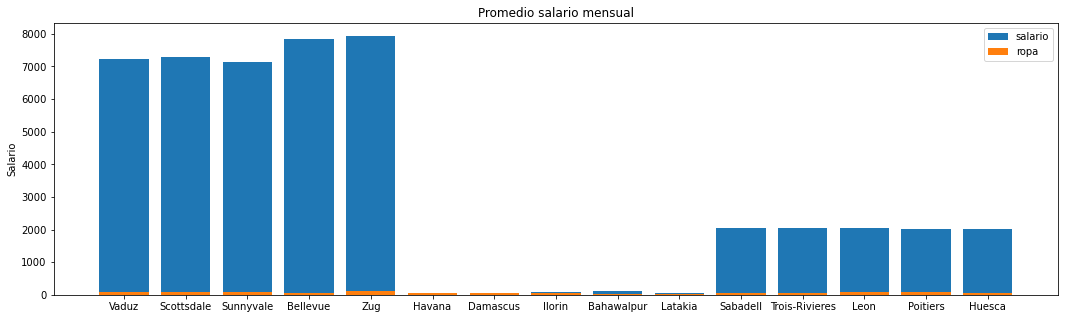

In [287]:
city=list(city_total['city'])
salary=list(city_total['x54'])
firts_n=list(city_total['clothes'])
fig, ax=plt.subplots()
ax.set_ylabel('Salario')
ax.set_title('Promedio salario mensual')
plt.bar(city,salary,label='salario')
plt.bar(city,firts_n,label='ropa')
ax.legend()
plt.gcf().set_size_inches(18,5)
plt.show()

**Conclusión:** Observamos que en las ciudades mas pobres como La Havana y Damasco el costo de la ropa es superior al salario mensual.

4.1.2. Gasolina

Analizamos el precio de la gasolina en cada una de estas 15 ciudades seleccionadas.
El campo **"x33"** nos aporta el dato de cuanto cuesta 1 litro de gasolina en USD.
Vamos a utilizar el grafico de matplotlib de tipo pastel y representar los resultados en porcentajes:

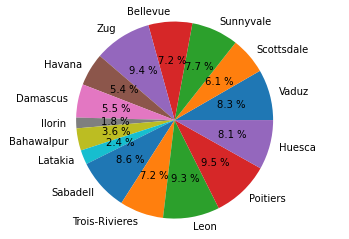

In [288]:
fuel=list(city_total['x33'])
labels = list(city_total['city'])
plt.pie(fuel, labels=labels, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

**Conclusión:** Observamos que la ciudad de Poitiers es la que tiene la gasolina mas cara y sin embargo es una ciudad que corresponde al grupo de las de salario normal.

4.1.3. Ocio

Vamos analizar cuanto cuesta ir al cine y el gimnasio en las ciudades más pobres respecto al salario que ganan:

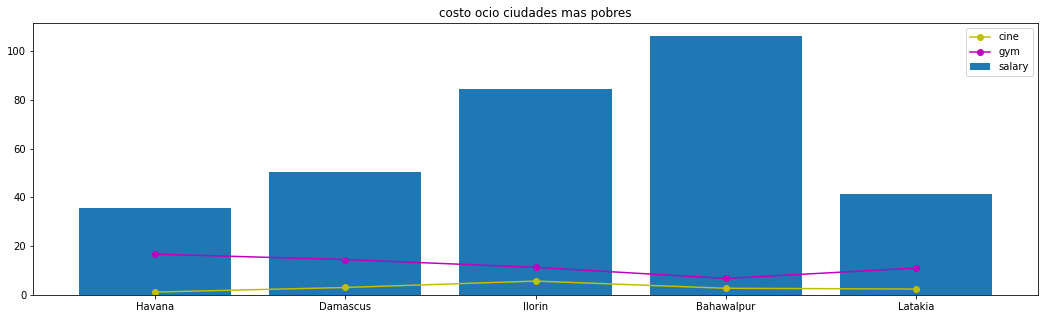

In [147]:
cine_min=list(city_min['x41'])
gym_min=list(city_min['x39'])
salary_m=list(city_min['x54'])
city_m=list(city_min['city'])
fig, ax=plt.subplots()
ax.set_title('costo ocio ciudades mas pobres')
ax.plot(city_m,cine_min,'yo-',label='cine')
ax.plot(city_m,gym_min,'mo-',label='gym')
plt.bar(city_m,salary_m,label='salary')
plt.gcf().set_size_inches(18,5)
ax.legend()
plt.show()

**Conclusión:** Observamos que en la Havana ir al gymnasio supone la mitad del salario.

4.1.4. Elección de transporte:

A continuación vamos a mostrar un analisis para conocer que es mas economico en cada ciudad, si coger el autobus o un taxi, en nuestro dataframe en el campo **"x28"** tenemos el precio de un billete en autobus y en el campo **"x31"** el precio por km recorrido en taxi. Vamos a crearnos una funcion que denotaremos como **"choose_transport"** la cual nos indique en funcion del numero de km que vamos a realizar que es mas economico, coger un taxi o el autobus.
Esta funcion requiere de un parametro **"n"** que debemos introduir, este parametro describe el numero de kilometros que vamos a realizar.

In [148]:
def choose_transport(n):
    for i in range(len(city_total)):
        if city_total.iloc[i]['x28']>(city_total.iloc[i]['x31']*n):
            print('Si estas en: ' + str(city_total.iloc[i]['city'])+','+' coge un taxi')
        else:
            print('Si estas en: ' + str(city_total.iloc[i]['city'])+','+' coge el autobus')

Si vamos a realizar 3 kilometros, es tan sencillo como nombrar a la funcion por su nombre y añadirle el numero 3 como parametro, esta me devuelve automaticamente la opcion mas economica en funcion de la ciudad en la que nos encontremos.

**Conclusión:**

In [149]:
choose_transport(3)

Si estas en: Vaduz, coge un taxi
Si estas en: Scottsdale, coge el autobus
Si estas en: Sunnyvale, coge el autobus
Si estas en: Bellevue, coge el autobus
Si estas en: Zug, coge el autobus
Si estas en: Havana, coge el autobus
Si estas en: Damascus, coge el autobus
Si estas en: Ilorin, coge el autobus
Si estas en: Bahawalpur, coge el autobus
Si estas en: Latakia, coge el autobus
Si estas en: Sabadell, coge el autobus
Si estas en: Trois-Rivieres, coge el autobus
Si estas en: Leon, coge el autobus
Si estas en: Poitiers, coge el autobus
Si estas en: Huesca, coge el autobus


A continuación vamos a graficar nuestro resultado si recorremos 3km:

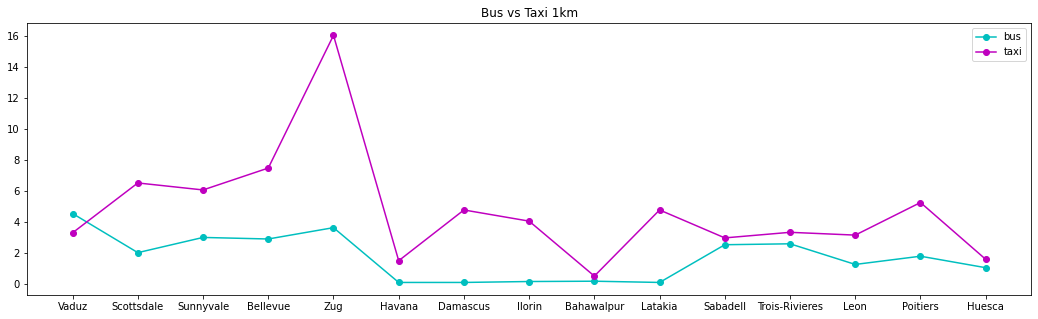

In [152]:
bus=list(city_total['x28'])
taxi=list(city_total['x31']*3)
city=list(city_total['city'])
fig, ax=plt.subplots()
ax.set_title('Bus vs Taxi 1km')
ax.plot(city,bus,'co-',label='bus')
ax.plot(city,taxi,'mo-',label='taxi')
plt.gcf().set_size_inches(18,5)
ax.legend()
plt.show()

**Conclusión:** Observamos como habiamos demostrado antes que Vaduz es la unica ciudad en la que sigue siendo mas economico coger un taxi que un autobus si solo vamos a realizar 3kilometros de viaje.

4.1.5. Comida Mcdonals vs Comida mercado

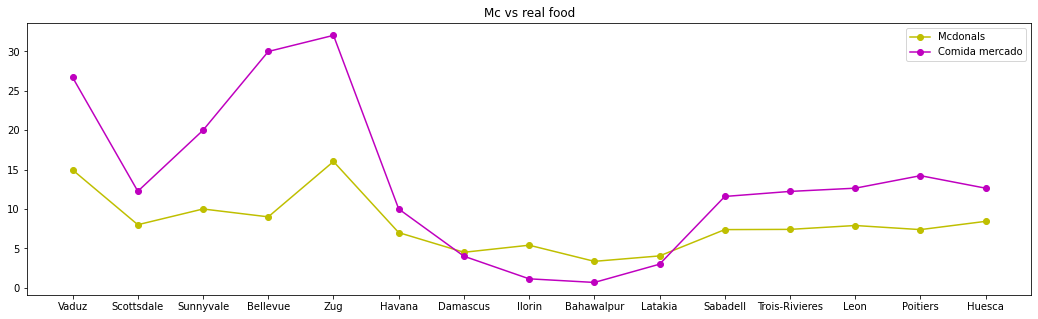

In [153]:
city=list(city_total['city'])
mc=list(city_total['x3'])
realfood=list(city_total['x1'])
fig, ax=plt.subplots()
ax.set_title('Mc vs real food')
ax.plot(city,mc,'yo-',label='Mcdonals')
ax.plot(city,realfood,'mo-',label='Comida mercado')
plt.gcf().set_size_inches(18,5)
ax.legend()
plt.show()

**Conclusión:** Observamos que en las ciudades mas pobres, comer un menu en el Mcdonals es mas caro que un menu de comida real en un mercado/restaurante barato local. ¿Capitalismo?, yo digo sí.

4.1.6. Coste general

Una vez comprobadas las diferencias que existen entre las ciudades, vamos analizar el costo de la vida en general en un mes en cada una de ellas, para ello vamos a tener en cuenta los siguientes campos, los datos que vamos a calcular son para 1 persona:

Realizamos la compra de productos de primera necesidad la mitad de los dias del mes, es por ello que el campo **"first_need_p" lo multiplicaremos por 15 días**

Suponemos que salimos a comer fuera a un restaurante barato/mercado local una vez por fin de semana, es decir 4 veces al mes:
**"x1"*4**

Cuando salimos a comer fuera, suponemos que nos tomamos una cerveza nacional:
**"x4"*4**

Utilizamos internet:
**"x38**

Gastos de luz, agua, electricidad, etc:
**"x36"**

No utilizamos coche, utilizamos autobus y compramos el abono mensual:
**"x29"**

Nos apuntamos al gym:
**"x39"**

Vamos una vez al cine a ver un estreno:
**"x41"**

Tenemos un alquiler de 1 dormitorio a las afueras de la ciudad:
**"x49"**

In [154]:
city_total['cost_live']=((city_total['first_need_p']*15)+(city_total['x1']*4)+(city_total['x4']*4)+(city_total['x29'])+(city_total['x39'])+(city_total['x41'])+(city_total['x49'])+(city_total['x38'])+(city_total['x36']))

Graficamos nuestro resultado:

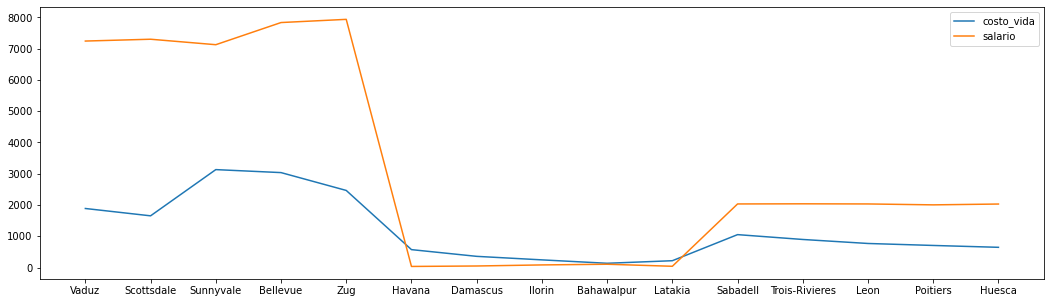

In [155]:
costo_vida=list(city_total['cost_live'])
salary=list(city_total['x54'])
city=list(city_total['city'])
fig, ax=plt.subplots()
ax.plot(city,costo_vida,label='costo_vida')
ax.plot(city,salary,label='salario')
ax.legend()
plt.gcf().set_size_inches(18,5)
plt.show()

**Conclusion:** Observamos que en 5 ciudades el coste de la vida es superior al salario.

4.1.7. Calidad de vida:

Podemos realizar un analisis matemático de que ciudades tienen una "buena" calidad de vida suponiendo que si el campo **"cost_live"<"x54"** tienen buena calidad de vida y lo denotamos con un 1, del contrario tienen mala calidad de vida y lo denotaremos con un 0. Para ello creamos un nuevo campo que se llame **"quality_live"** e incluimos esta informacion en el:

In [156]:
city_total['quality_live']=np.where(city_total['cost_live']<city_total['x54'],1,0)

Vamos a sacar el numero de ciudades que no tienen una buena calidad de vida segun los parametros que hemos descrito anteriormente:

In [157]:
city_total['quality_live'].value_counts()

1    10
0     5
Name: quality_live, dtype: int64

**Conclusión:** Observamos que en 5 ciudades diferentes el costo de la vida general mensual es mayor que el salario mensual que reciben.

A continuación vamos a graficarlo para ver con mayor claridad la gravedad del asunto.
Primero creamos un nuevo dataframe con 4 paises, este nuevo dataframe se va llamar **"city_0"**

In [158]:
city_0=city_total.loc[city_total['quality_live']==0]
city_0

,city,country,x1,x3,x4,x28,x29,x31,x33,x36,x38,x39,x41,x49,x54,first_need_p,clothes,cost_live,quality_live
5,Havana,Cuba,10.00,7.00,2.50,0.10,20.00,0.50,1.14,37.14,165.00,16.67,1.12,222.50,35.75,4.06500,64.2500,573.40500,0
6,Damascus,Syria,4.00,4.50,1.75,0.10,17.00,1.59,1.16,18.48,50.67,14.47,3.00,182.54,50.24,3.29500,61.6375,358.58500,0
7,Ilorin,Nigeria,1.13,5.40,0.68,0.16,13.51,1.35,0.37,18.01,43.74,11.26,5.63,112.57,84.43,2.26625,63.6000,245.95375,0
8,Bahawalpur,Pakistan,0.67,3.35,4.47,0.18,9.39,0.17,0.77,40.23,16.76,6.71,2.68,22.35,106.17,1.22750,19.7325,137.09250,0
9,Latakia,Syria,2.99,4.04,1.00,0.10,14.23,1.59,0.50,13.21,50.67,10.97,2.36,76.78,41.25,2.31750,35.8575,218.94250,0


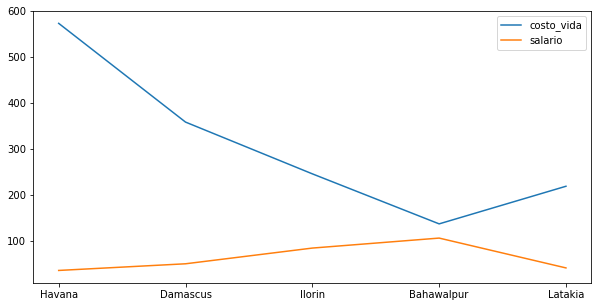

In [159]:
costo_vida=list(city_0['cost_live'])
salary=list(city_0['x54'])
city=list(city_0['city'])
fig, ax=plt.subplots()
ax.plot(city,costo_vida,label='costo_vida')
ax.plot(city,salary,label='salario')
ax.legend()
plt.gcf().set_size_inches(10,5)
plt.show()

4.1.8. Bienestar:

Vamos analizar que ciudad de las 15 que hemos seleccionado es la ciudad que ofrece mayor bienestar, para ello creamos un nuevo campo que denotaremos como **"wellness"** y lo calcularemos como la resta del salario mensual y los gastos mensuales de vivir:

In [160]:
city_total['wellness']=(city_total['x54']-city_total['cost_live'])

A continuacion localizamos que fila cumple que dicho valor es máximo.

In [161]:
city_total.loc[city_total['wellness']==city_total['wellness'].max()]

,city,country,x1,x3,x4,x28,x29,x31,x33,x36,x38,x39,x41,x49,x54,first_need_p,clothes,cost_live,quality_live,wellness
1,Scottsdale,United States,12.25,8.0,6.0,2.02,50.0,2.17,1.28,132.38,92.25,34.75,12.0,1166.67,7300.0,6.19625,75.13,1653.99375,1,5646.00625


Realizamos lo mismo pero para buscar que ciudad es la que menos bienestar me garantiza

In [162]:
city_total.loc[city_total['wellness']==city_total['wellness'].min()]

,city,country,x1,x3,x4,x28,x29,x31,x33,x36,x38,x39,x41,x49,x54,first_need_p,clothes,cost_live,quality_live,wellness
5,Havana,Cuba,10.0,7.0,2.5,0.1,20.0,0.5,1.14,37.14,165.0,16.67,1.12,222.5,35.75,4.065,64.25,573.405,0,-537.655


## 5. Correlación entre variables
Vamos a realizar el analisis de la correlacion entre las variables del dataset, para ello utilizamos el comando .corr() y los metodos de matplotlib para obtener un grafico de colores.

In [120]:
corr_data=city_total.corr()
corr_data.style.background_gradient(cmap=plt.get_cmap('RdYlGn'),axis=1,vmin=-1,vmax=1)

,x1,x3,x4,x28,x29,x31,x36,x38,x39,x41,x48,x49,x54,first_need_p,fruits&vegetables,drinks_rest,drinks_market,clothes,cost_live,quality_live,wellness
x1,1.000000,0.897515,0.739474,0.873050,0.662968,0.638824,0.944041,0.118148,0.954410,0.868597,0.784731,0.815840,0.875706,0.902353,0.829552,0.828830,0.565080,0.797045,0.869553,0.723254,0.841663
x3,0.897515,1.000000,0.624844,0.863957,0.547773,0.607783,0.857519,0.105083,0.824768,0.920633,0.662180,0.646804,0.800455,0.894263,0.784810,0.741148,0.389746,0.883229,0.714317,0.658390,0.804099
x4,0.739474,0.624844,1.000000,0.722654,0.661068,0.531393,0.788870,0.038535,0.645651,0.739617,0.742073,0.732056,0.822884,0.750281,0.694692,0.967951,0.734280,0.554255,0.763870,0.620657,0.813878
x28,0.873050,0.863957,0.722654,1.000000,0.662965,0.481605,0.888690,-0.077323,0.831404,0.938974,0.718815,0.753800,0.852714,0.820948,0.796407,0.841579,0.633600,0.754184,0.797009,0.808080,0.841028
x29,0.662968,0.547773,0.661068,0.662965,1.000000,0.471098,0.587216,0.068250,0.562109,0.683136,0.878465,0.917083,0.753417,0.623805,0.707059,0.656868,0.753026,0.579384,0.899137,0.554242,0.658924
x31,0.638824,0.607783,0.531393,0.481605,0.471098,1.000000,0.579922,0.055251,0.662082,0.617823,0.613868,0.571209,0.637496,0.815389,0.541031,0.553433,0.382356,0.618350,0.609068,0.325273,0.623053
x36,0.944041,0.857519,0.788870,0.888690,0.587216,0.579922,1.000000,-0.019894,0.910110,0.898640,0.765115,0.773999,0.903004,0.838620,0.786148,0.865518,0.576283,0.749642,0.825710,0.815433,0.898532
x38,0.118148,0.105083,0.038535,-0.077323,0.068250,0.055251,-0.019894,1.000000,0.019826,-0.099977,0.239546,0.137571,0.111873,0.143809,0.330358,0.094658,0.305809,0.166229,0.158761,-0.217942,0.086940
x39,0.954410,0.824768,0.645651,0.831404,0.562109,0.662082,0.910110,0.019826,1.000000,0.816458,0.716997,0.763595,0.830443,0.865299,0.790654,0.754523,0.491576,0.677963,0.814558,0.672816,0.802498
x41,0.868597,0.920633,0.739617,0.938974,0.683136,0.617823,0.898640,-0.099977,0.816458,1.000000,0.779216,0.772733,0.910800,0.861385,0.810674,0.822593,0.569339,0.838701,0.814633,0.766548,0.914151


Observamos que la maxima correlacion coincide con la diagonal, estos datos corresponden a la dependencia que existe entre la variable y ella misma, es importante eliminar los valores para poder sacar conclusiones acerca de la correlacion maxima existente:

In [170]:
corr_data=city_total.corr()
np.fill_diagonal(corr_data.values,0)
corr_data.style.background_gradient(cmap=plt.get_cmap('RdYlGn'),axis=1,vmin=-1,vmax=1)

,x1,x3,x4,x28,x29,x31,x33,x36,x38,x39,x41,x49,x54,first_need_p,clothes,cost_live,quality_live,wellness
x1,0.000000,0.897515,0.739474,0.873050,0.662968,0.638824,0.703555,0.944041,0.118148,0.954410,0.868597,0.815840,0.875706,0.902353,0.797045,0.869553,0.723254,0.841663
x3,0.897515,0.000000,0.624844,0.863957,0.547773,0.607783,0.665121,0.857519,0.105083,0.824768,0.920633,0.646804,0.800455,0.894263,0.883229,0.714317,0.658390,0.804099
x4,0.739474,0.624844,0.000000,0.722654,0.661068,0.531393,0.544542,0.788870,0.038535,0.645651,0.739617,0.732056,0.822884,0.750281,0.554255,0.763870,0.620657,0.813878
x28,0.873050,0.863957,0.722654,0.000000,0.662965,0.481605,0.688597,0.888690,-0.077323,0.831404,0.938974,0.753800,0.852714,0.820948,0.754184,0.797009,0.808080,0.841028
x29,0.662968,0.547773,0.661068,0.662965,0.000000,0.471098,0.414363,0.587216,0.068250,0.562109,0.683136,0.917083,0.753417,0.623805,0.579384,0.899137,0.554242,0.658924
x31,0.638824,0.607783,0.531393,0.481605,0.471098,0.000000,0.304054,0.579922,0.055251,0.662082,0.617823,0.571209,0.637496,0.815389,0.618350,0.609068,0.325273,0.623053
x33,0.703555,0.665121,0.544542,0.688597,0.414363,0.304054,0.000000,0.740017,-0.138092,0.602756,0.630383,0.435869,0.516045,0.619589,0.693827,0.493856,0.859633,0.503999
x36,0.944041,0.857519,0.788870,0.888690,0.587216,0.579922,0.740017,0.000000,-0.019894,0.910110,0.898640,0.773999,0.903004,0.838620,0.749642,0.825710,0.815433,0.898532
x38,0.118148,0.105083,0.038535,-0.077323,0.068250,0.055251,-0.138092,-0.019894,0.000000,0.019826,-0.099977,0.137571,0.111873,0.143809,0.166229,0.158761,-0.217942,0.086940
x39,0.954410,0.824768,0.645651,0.831404,0.562109,0.662082,0.602756,0.910110,0.019826,0.000000,0.816458,0.763595,0.830443,0.865299,0.677963,0.814558,0.672816,0.802498


Una vez hemos sustituido la diagonal por valor 0 (indicando que no existe correlacion entre la variable y ella misma) podemos hacer el estudio de que variables tienen mayor correlacion. 

Estos resultados numericos podemos graficarlos con un mapa de calor, la libreria de seaborn tiene incorpora esta opción, que nos muestra visualmente y de una manera muy rapida y eficaz que variables se relacionan entre sí. La escala de colores va del 0 al 1 siendo el 0 los colores mas azulados los que menos relacion tienen y el 1 los colores rojizos los que estan intensamente relacionados:

<AxesSubplot:>

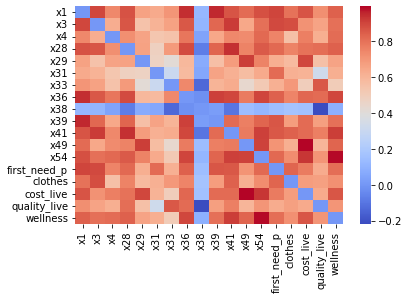

In [176]:
sns.heatmap(corr_data, cmap = 'coolwarm')

Observamos que el campo **"quality_live"** no aporta ningun tipo de informacion ya que sus valores van de 0 a 1 en función de otro campo, por lo que eliminamos este campo para todas las correlaciones:

In [174]:
corr_data.drop(['quality_live'],axis=1).idxmax()

x1                       x39
x3                       x41
x4                       x54
x28                      x41
x29                      x49
x31             first_need_p
x33             quality_live
x36                       x1
x38                  clothes
x39                       x1
x41                      x28
x49                cost_live
x54                 wellness
first_need_p              x1
clothes                   x3
cost_live                x49
wellness                 x54
dtype: object

De todas estas correlaciones positivas, solo tiene sentido hablar de la que existe entre la columna **"x49"**(Alquiler 1 dormitorio fuera del centro ciudad) y **"cost_live"** y por otro lado la existente entre **"x54"**(promedio salario mensual) y **"wellness"**.

A continuación vamos a realizar el estudio de una de ellas:

### 5.1. Correlacion x49-cost_live:

In [172]:
city_total['x49'].corr(city_total['cost_live'])

0.9940466411919763

Observamos que la correlacion es proxima a 1, esto quiere decir que existe una correlacion muy positiva, es decir, cuanto más aumenta el precio del alquiler, mas costosa se vuelve la vida.
Vamos a utilizar el metodo de minimos cuadrados para determinar la función continua que mejor se aproxime a los datos (recta de regresión) proporcionando una demostración visual de la relación entre los puntos de los mismos.

Primero me creo dos arrays con los valores de las columnas 'x49' y 'cost_live' los cuales denotare como xn e yn.

In [268]:
xn=np.array(city_total['x49'])
yn=np.array(city_total['cost_live'])

In [269]:
#Obtengo el valor de n (longitud de mis datos)
n=len(xn)
#Hago las operaciones correspondientes al metodo de cuadrados minimos:
Sum_x=sum(xn)
Sum_y=sum(yn)
Sum_xx=sum(xn**2)
Sum_xy=sum(xn*yn)

In [270]:
#Reemplazo estos valores en los valores de la recta que me creo: a_0 y a_1:
a_0=(Sum_xx*Sum_y-Sum_xy*Sum_x)/(n*Sum_xx-Sum_x**2)
a_1=(n*Sum_xy-Sum_x*Sum_y)/(n*Sum_xx-Sum_x**2)
print(a_0,a_1)


211.80009169893071 1.243864397047392


In [271]:
#Genero valores para plotear la recta segun a_0 y a_1
x=np.linspace(10, 3500, 2)
y=a_0+a_1*x

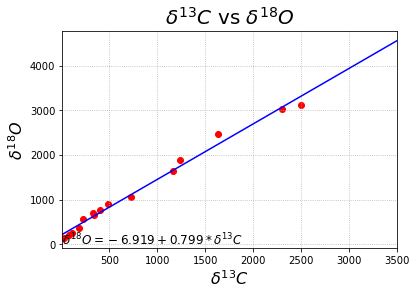

In [272]:
plt.figure(1)
plt.scatter(xn, yn, color='r')
plt.grid(linestyle='dotted')
plt.plot(x, y, color='b')
plt.title(r'$\delta ^{13}C$ vs $\delta ^{18}O$', fontsize=20)
plt.xlabel(r'$\delta ^{13}C$', fontsize=16)
plt.ylabel(r'$\delta ^{18}O$', fontsize=16)
plt.xlim(10, 3500)
plt.text(9, -1.5, r'$\delta ^{18}O=-6.919+0.799*\delta ^{13}C$',
    fontsize=12)
plt.show()

Por otro lado Seaborn me ofrece la posibilidad de graficar una variable y la correlacion que existe con respecto al resto.

<AxesSubplot:>

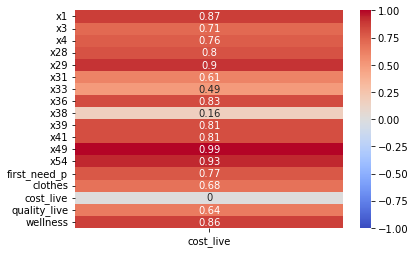

In [173]:
sns.heatmap(corr_data[['cost_live']], vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

## 6. Conclusiones.
Se pueden hacer infinidad de mediciones, funciones, algoritmos, etc. que comparen el costo de vida en las diferentes ciudades, yo he querido dar alguna pincelada con las ideas que se ma han ido ocurriendo. Al no disponer de todo el tiempo del mundo, he querido ir recorriendo los apuntes de la asignatura e ir realizando el tratamiento de datos en función a ellos.

Tras el analisis de los datos sacamos como principal conclusion que las ciudades en las que los salarios son mas elevados tienen una mayor calidad de vida frente a las ciudades de salarios mas bajos, en las que desgraciadamente los productos de primera necesidad tienen casi el mismo valor que en las ciudades en las que los salarios son claramente superiores.
